### ML Midterm Exam

#### Will Dowling

In answering each of the following questions please include a) the question as a markdown header in your Jupyter notebook, b)  the raw code that you used to generate any results, tables, or figures, and c) the top ten or fewer rows of the data-frame (do not include more than ten rows for any table in your report).

Include any plots or figures generated from your code as well.

Use the spam dataset and variable descriptions in the files/Mid-Term Exam folder of the course website to answer the following questions.   

#### 1.  Import the spam dataset and print the first six rows.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
spam_df = pd.read_csv('/content/drive/MyDrive/Personal Notebooks/ML/Midterm/spam_dataset.csv')
print(spam_df.shape)
spam_df.head(6)

(4601, 58)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
spam_df.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

#### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

My assumption would be that 'char_freq_#', 'char_freq_!', and 'capital_run_length_average' would all be important predictors of spam. This is from the assumption that in my experience, most spam messaging includes special characters like '#', emphatic langauge that is punctuated by exclamation points, and the use of capital letters.

#### 3.  Visualize the univariate distribution of each of the variables in the previous question.  

count    4601.000000
mean        0.044238
std         0.429342
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.829000
Name: char_freq_#:, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

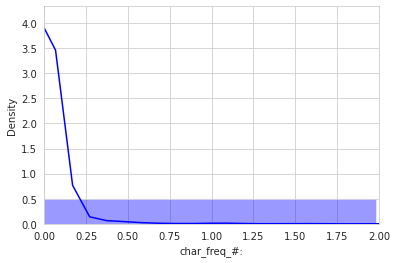

In [ ]:
# Visualizing distribution of test scores (dependent variable)
import seaborn as sns
print(spam_df['char_freq_#:'].describe())
sns.set_style('whitegrid')
fig1 = sns.distplot(spam_df['char_freq_#:'], kde = True, color ='blue', bins = 10)
fig1.set_xlim(0, 2)

count    4601.000000
mean        5.191515
std        31.729449
min         1.000000
25%         1.588000
50%         2.276000
75%         3.706000
max      1102.500000
Name: capital_run_length_average:, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

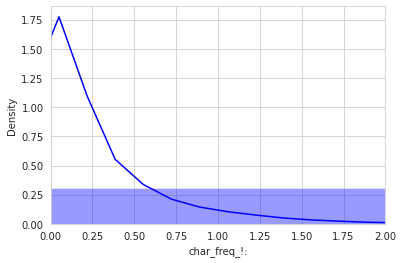

In [ ]:
print(spam_df['capital_run_length_average:'].describe())
sns.set_style('whitegrid')
fig1 = sns.distplot(spam_df['char_freq_!:'], kde = True, color ='blue', bins = 10)
fig1.set_xlim(0, 2)

count    4601.000000
mean        5.191515
std        31.729449
min         1.000000
25%         1.588000
50%         2.276000
75%         3.706000
max      1102.500000
Name: capital_run_length_average:, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 50.0)

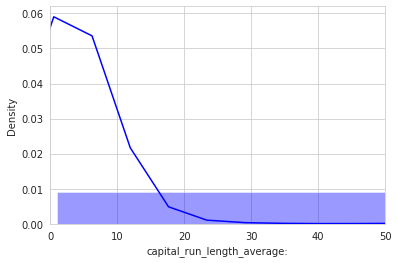

In [ ]:
print(spam_df['capital_run_length_average:'].describe())
sns.set_style('whitegrid')
fig1 = sns.distplot(spam_df['capital_run_length_average:'], kde = True, color ='blue', bins = 10)
fig1.set_xlim(0, 50)

#### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

The types of supervised machine learning models which we have learned so far that can be used to predict dependent variables like "spam" are:

- Logistic Regression Models
- Ridge (L2 Penalized) Logistic Models
- Lasso (L1 Penalized) Logistic Models
- KNN Classification Models
- Decision Tree Classifier Models
- Multiclass (multinomial) Models
- Support Vector Machines
- Random Forrest Classification

#### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

For the creation of any supervised machine learning algorithm, the objective is to predict a target feature (y) for some data matrix (x). The most effective machine learning models *generalize* well, meaning that their architecture can be used to predict unseen data accurately. In order to create a model that can generalize well, it is important to split the data matrix into training and testing sets. 

Training data is used to teach the model how to make predictions by adjusting its parameters based on the input features. The model then uses this learned knowledge to make predictions. However, it is important to evaluate the model's performance on data that it has not seen before to ensure that it is not simply memorizing the training data but is actually learning to generalize to new data.

The test data is a set of data that is 'held back' when designing a model so that it can be used to evaluate the model's performance. By measuring the model's accuracy on the test data, we can estimate how well the model is likely to perform on new, unseen data.

If the model performs well on training data but poorly on testing data, then there is a problem of *overfitting*, meaning that it has memorized the training data instead of learning to generalize. In contrast, if the model performs poorly on the training and the testing data, then there is a problem of *underfiting* whereby the model is too simple to capture the underlying patterns in the data. If the model can accurately predict the outcome variable in both training and testing sets, then it can be said to generalize well. 

#### 6. What is k-fold cross validation and what do we use it for?

K-fold cross-validation is a technique whereby multiple permutations of splits are made on an x data matrix to increase the amount of information to train a machine learning model. It involves splitting the data into *k* equally sized subsets or "folds" and training the model on each of these folds while using the remaining fold as a test set. This process is repeated k times, with each fold being used as a test set exactly once. The performance of the model is then averaged across all k folds to obtain an overall estimate of the model's performance.

This process can help to ensure that a model is not overfitting or underfitting on the available data that is being used to create it. This helps to 'boost' the ability of a given model to generalize to new, unseen data. It also allows for a more reliable method of estimating a model's performance, given that the model is tested against each set of k-folds and its accuracy rate is averaged, which helps to reduce the impact of any one particular set of test data that may be unrepresentative or biased in some way.


#### 7. How is k-fold cross validation different from stratified k-fold cross validation?

K-fold cross validation and stratified k-fold cross validaiton both differ in how they handle the distribution of class labels or target variables in the data.

In standard k-fold cross-validation, the data is split into k equally sized subsets, and each subset is used as the test set once while the other k-1 subsets are used for training. The subsets are usually selected randomly. This approach can be problematic when dealing with imbalanced datasets, where one class or target variable occurs much more frequently than others. In this case, there is a risk that one or more of the subsets used for testing may not include examples from the under-represented class, which can lead to biased performance estimates.

Stratified k-fold cross-validation addresses this issue by ensuring that the class or target variable distribution is maintained across all folds. In stratified k-fold cross-validation, the data is split into k equally sized subsets, just like in standard k-fold cross-validation. However, before the split is made, the data is first partitioned based on the class or target variable, and each subset is chosen such that it contains roughly the same proportions of each class. This ensures that each fold represents a balanced sample of the overall class or target variable distribution.

#### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

In [3]:
# Creating X and Y dataframes
y = spam_df['spam']
X = spam_df[['char_freq_#:', 'char_freq_!:', 'capital_run_length_average:']]
display(X.head())
print(y[0:5])

,char_freq_#:,char_freq_!:,capital_run_length_average:
0,0.000,0.778,3.756
1,0.048,0.372,5.114
2,0.010,0.276,9.821
3,0.000,0.137,3.537
4,0.000,0.135,3.537


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# train_test_split(X,y) to create four new data sets to .75/.25 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

print(X.shape)
X_train.shape

(4601, 3)


(3450, 3)

In [5]:
#Scaling the data
from sklearn import preprocessing

#Setting up the the standard scaler to the X_train data using fit()
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
## Testing KNN Classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from statistics import mean 

#Defining model architecture using gridsearchCV to get best parameters
#create dictionary data object with keys equal to parameter name 'n_neighbors' 
param_grid_knn = {'n_neighbors': np.arange(1,17,2)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=10)

#use meta model methods to fit score and predict model:
grid_knn.fit(X_train_scaled, y_train)

# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("Best parameters: {}".format(grid_knn.best_params_))
print("Test-set score: {:.3f}".format(grid_knn.score(X_test_scaled, y_test)))

Best parameters: {'n_neighbors': 15}
Test-set score: 0.821


In [ ]:
print("KFold:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), X_train_scaled, y_train, cv=kfold))))
print("StratifiedKFold:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), X_train_scaled, y_train, cv=skfold))))
print("RepeatedKFold:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), X_train_scaled, y_train, cv=rkf))))

KFold:0.825
StratifiedKFold:0.825
RepeatedKFold:0.821


Using the above three parameters, it looks like a KNN Classificaiton model achieves an accuracy rate of roughly 80% on scaled x matrix data. The tuning parameter for this model is the *k* number of neighbors, which was found to be 11 using gridsearch methods. Evaluating the model using just the test set data yeilds an 82.1% accuracy rate, however when employing cross-validation techniques we see that the mean highest cross-validation score is closer to 82.5% using standard Kfold methods. 

#### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

#create dictionary data object with keys equal to parameter name 'C' 
param_grid_logit = {'C': np.logspace(-4, 4, 20)}
grid_logit = GridSearchCV(LogisticRegression(), param_grid=param_grid_logit, cv=10)

#use meta model methods to fit score and predict model:
grid_logit.fit(X_train, y_train)

# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)

#Print test set score and best parameters
print("Best parameters: {}".format(grid_logit.best_params_))
print("Test-set score: {:.3f}".format(grid_logit.score(X_test, y_test)))

Best parameters: {'C': 11.288378916846883}
Test-set score: 0.767


In [ ]:
print("KFold:{:.3f}".format(
mean(cross_val_score(LogisticRegression(C=11.3), X_train, y_train, cv=kfold))))

KFold:0.781


It looks like a "standard" unpenalized logistic regression does not successfully predict test data better than a KNN classificiation model. The model's accuracy on test data and Kfold cross-validation data is 77% and 78%, respectively. These figures are both roughly 6% less accurate than the KNN model, making this method less effective. 

After using gridsearch cv to tune the 'C' hyperparameter, the optimal value is ~11.3. 

#### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [ ]:
# Lasso and Ridge Logistic Regression models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#create dictionary data object with keys equal to parameter name 'C' 
param_grid_logit2 = { 'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}
grid_logit2 = GridSearchCV(LogisticRegression(), param_grid=param_grid_logit2, cv=10)

#use meta model methods to fit score and predict model:
grid_logit2.fit(X_train, y_train)

# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=5)

#Print test set score and best parameters
print("Best parameters: {}".format(grid_logit2.best_params_))
print("Test-set score: {:.3f}".format(grid_logit2.score(X_test, y_test)))

Best parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
Test-set score: 0.766


In [ ]:
lassoreg = LogisticRegression(C=.6, penalty='l1',solver='liblinear').fit(X_train, y_train)

print("Lasso KFold:{:.3f}".format(
mean(cross_val_score(lassoreg, X_train, y_train, cv=kfold))))

Lasso KFold:0.781


Using a Lasso regression does not result in any improved predictive power relative to a standard logistic regression. In fact, the test set score is slightly lower than the standard logistic regressionl. The best parameters ('l1', C=.6) for the model were determined through gridsearch CV. 

#### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?

In [7]:
#Decision tree classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#create dictionary data object for parameters
param_grid_rf = {'n_estimators': [100, 500, 900],
              'max_depth': [3, 5, 7, 9]}
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=10)

#use meta model methods to fit score and predict model:
grid_rf.fit(X_train, y_train)

#Print test set score and best parameters
print("Best parameters: {}".format(grid_rf.best_params_))
print("Test-set score: {:.3f}".format(grid_rf.score(X_test, y_test)))

Best parameters: {'max_depth': 9, 'n_estimators': 900}
Test-set score: 0.836


In [ ]:
#Print best Kfold cross validation score
rf2 = RandomForestClassifier(n_estimators=900, max_depth=9).fit(X_train, y_train)
print("Rf KFold:{:.3f}".format(mean(cross_val_score(rf2, X_train, y_train, cv=kfold))))

Rf KFold:0.836


It looks like a random forrest classification model yeilds the highest accuracy rate among the models that I have tested so far, with a correct prediction rate of 83.6% on test data. This is using a max depth of 9 and 900 estimators, which are the optimal hyperparameter settings given by gridsearch. 

#### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

In [ ]:
#Reviewing three additional variables to see if scaling is necessary
print(spam_df['word_freq_free:'].describe())
print(spam_df['char_freq_$:'].describe())
print(spam_df['capital_run_length_total:'].describe())

count    4601.000000
mean        0.248848
std         0.825792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max        20.000000
Name: word_freq_free:, dtype: float64
count    4601.000000
mean        0.075811
std         0.245882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.052000
max         6.003000
Name: char_freq_$:, dtype: float64
count     4601.000000
mean       283.289285
std        606.347851
min          1.000000
25%         35.000000
50%         95.000000
75%        266.000000
max      15841.000000
Name: capital_run_length_total:, dtype: float64


In [ ]:
#Recreating X Matrix 
X_n = spam_df[['char_freq_#:', 'char_freq_!:', 'capital_run_length_average:', 'word_freq_free:', 'char_freq_$:', 'capital_run_length_total:']]

# train_test_split(X,y) to create four new data sets to .75/.25 split.
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y, test_size=.25, random_state=1)

print(X_n.shape)
X_train_n.shape

(4601, 6)


(3450, 6)

In [ ]:
#Re-running best performing model (Random Forest Classifier)

#use meta model methods to fit score and predict model:
grid_rf.fit(X_train_n, y_train_n)

#Print test set score
print("Test-set score: {:.3f}".format(grid_rf.score(X_test_n, y_test_n)))

#Print best Kfold cross validation score
rf2 = RandomForestClassifier(n_estimators=900, max_depth=9).fit(X_train_n, y_train_n)
print("Rf KFold:{:.3f}".format(mean(cross_val_score(rf2, X_train_n, y_train_n, cv=kfold))))

Test-set score: 0.894
Rf KFold:0.896


With the addition of the three new variables 'word_freq_free:', 'char_freq_$:', and 'capital_run_length_total:', the accuracy of the Random Forrest model increases to nearly 90%, marking a roughly 7% improvement in accuracy. 

#### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [ ]:
#Setting up the the standard scaler to the X_train data for the KNN model
scaler.fit(X_train_n)
X_train_n_scaled = scaler.transform(X_train_n)
X_test_n_scaled = scaler.transform(X_test_n)

#KNN Model
grid_knn.fit(X_train_n_scaled, y_train_n)
print("Best parameters: {}".format(grid_knn.best_params_))
print("KNN Test-set score: {:.3f}".format(grid_knn.score(X_test_n_scaled, y_test_n)))
print("KNN KFold:{:.3f}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=9), X_train_n_scaled, y_train_n, cv=kfold))))

#Logit Model
grid_logit.fit(X_train_n_scaled, y_train_n)
print("Best parameters: {}".format(grid_logit.best_params_))
print("Logit Test-set score: {:.3f}".format(grid_logit.score(X_test_n_scaled, y_test_n)))
print("Logit KFold:{:.3f}".format(
mean(cross_val_score(LogisticRegression(C=29.8), X_train_n_scaled, y_train_n, cv=kfold))))

#Lasso Model
grid_logit2.fit(X_train_n, y_train_n)
print("Best parameters: {}".format(grid_logit2.best_params_))
print("Lasso Test-set score: {:.3f}".format(grid_logit2.score(X_test_n, y_test_n)))
lassoreg2 = LogisticRegression(C=29.8, penalty='l1',solver='liblinear').fit(X_train_n, y_train_n)
print("Lasso KFold:{:.3f}".format(
mean(cross_val_score(lassoreg, X_train_n, y_train_n, cv=kfold))))

Best parameters: {'n_neighbors': 9}
KNN Test-set score: 0.879
KNN KFold:0.870
Best parameters: {'C': 29.763514416313132}
Logit Test-set score: 0.844
Logit KFold:0.841
Best parameters: {'C': 29.763514416313132, 'penalty': 'l1', 'solver': 'liblinear'}
Lasso Test-set score: 0.844
Lasso KFold:0.837


After re-running the KNN, Logit, and Lasso models, it looks like a Random Forrest model is still the most accurate model in regards to its ability to generalize to test data. It maintains an accuracy rate of 89.6%, whereas the next most accurate model in terms of predicting test data is the KNN model with scaled data, which displays an accuracy rate of 87.9%. 

#### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

One variable that we currently do not have access to, but which may increase the predictive power of the model, could be the frequency of special or unique characters ($, %, &, etc.) within the domain address name of the email sender. In my experience, most spam emails have odd or convoluted origin email addresses, and including a variable which documents this is some way could improve our prediction accuracy. 

#### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

The types of supervised machine learning models which we have learned so far that can be used to evaluate data with continuous dependent variables are:

- Linear Regression Models
- Ridge (L2 Penalized) Linear Regression Models
- Lasso (L1 Penalized) Linear Regression Models
- KNN Regression Models
- Decision Tree Regression Models
- Support Vector Machines
- Random Forrest Regression